In [1]:
# ===========================================
# CELL 1: COVID-19 DATA ANALYSIS PROJECT
# Hex Softwares Data Science Internship - Task 3
# ===========================================

print("🦠 COVID-19 DATA ANALYSIS PROJECT")
print("="*60)
print("Organization: Hex Softwares Pvt. Ltd.")
print("Domain: Data Science")
print("Task 3: COVID-19 Data Analysis Project")
print("="*60)

# Install required libraries
!pip install -q pandas numpy matplotlib seaborn plotly missingno
!pip install -q folium  # For geographical maps

print("✅ Libraries installed successfully!")

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
print("\n📊 Libraries imported and configured")

🦠 COVID-19 DATA ANALYSIS PROJECT
Organization: Hex Softwares Pvt. Ltd.
Domain: Data Science
Task 3: COVID-19 Data Analysis Project
✅ Libraries installed successfully!

📊 Libraries imported and configured


In [2]:
# ===========================================
# CELL 2: UPLOAD DATASET
# ===========================================

print("📤 UPLOAD COVID-19 DATASET")
print("="*50)
print("\n1. Download dataset from: https://www.kaggle.com/datasets/imdevskp/corona-virus-report")
print("2. Download 'covid_19_clean_complete.csv'")
print("3. Upload it when prompted below")

from google.colab import files
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]
print(f"\n✅ File uploaded: {filename}")

# Load dataset
covid_df = pd.read_csv(filename, parse_dates=['Date'])

print(f"\n📊 DATASET LOADED SUCCESSFULLY!")
print(f"Shape: {covid_df.shape[0]} rows × {covid_df.shape[1]} columns")

# Display basic info
print("\n🔍 DATASET PREVIEW:")
print(covid_df.head())
print(f"\n📅 Date Range: {covid_df['Date'].min()} to {covid_df['Date'].max()}")
print(f"🌍 Countries: {covid_df['Country/Region'].nunique()}")
print(f"📋 Columns: {covid_df.columns.tolist()}")

📤 UPLOAD COVID-19 DATASET

1. Download dataset from: https://www.kaggle.com/datasets/imdevskp/corona-virus-report
2. Download 'covid_19_clean_complete.csv'
3. Upload it when prompted below


Saving covid_19_clean_complete.csv to covid_19_clean_complete.csv

✅ File uploaded: covid_19_clean_complete.csv

📊 DATASET LOADED SUCCESSFULLY!
Shape: 49068 rows × 10 columns

🔍 DATASET PREVIEW:
  Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  

📅 Date Rang

In [3]:
# ===========================================
# CELL 3: DATA CLEANING & PREPROCESSING
# ===========================================

print("🧹 DATA CLEANING & PREPROCESSING")
print("="*50)

# 1. Check for missing values
print("\n1. MISSING VALUES ANALYSIS:")
missing_data = pd.DataFrame({
    'Column': covid_df.columns,
    'Missing_Values': covid_df.isnull().sum(),
    'Missing_Percent': (covid_df.isnull().sum() / len(covid_df)) * 100
}).sort_values('Missing_Percent', ascending=False)

print(missing_data.head(10))

# 2. Handle missing values
print("\n2. HANDLING MISSING VALUES:")

# Fill missing Province/State with Country/Region
covid_df['Province/State'] = covid_df['Province/State'].fillna(covid_df['Country/Region'])

# Fill missing Lat/Long with country averages
covid_df['Lat'] = covid_df.groupby('Country/Region')['Lat'].transform(lambda x: x.fillna(x.mean()))
covid_df['Long'] = covid_df.groupby('Country/Region')['Long'].transform(lambda x: x.fillna(x.mean()))

print("✅ Missing values handled")

# 3. Create new features
print("\n3. CREATING NEW FEATURES:")

# Active cases
covid_df['Active'] = covid_df['Confirmed'] - covid_df['Deaths'] - covid_df['Recovered']

# Mortality rate
covid_df['Mortality_Rate'] = (covid_df['Deaths'] / covid_df['Confirmed']) * 100
covid_df['Mortality_Rate'] = covid_df['Mortality_Rate'].fillna(0)

# Recovery rate
covid_df['Recovery_Rate'] = (covid_df['Recovered'] / covid_df['Confirmed']) * 100
covid_df['Recovery_Rate'] = covid_df['Recovery_Rate'].fillna(0)

# Date features
covid_df['Month'] = covid_df['Date'].dt.month
covid_df['Year'] = covid_df['Date'].dt.year
covid_df['Month_Year'] = covid_df['Date'].dt.to_period('M')

print(f"✅ Created {len(['Active', 'Mortality_Rate', 'Recovery_Rate', 'Month', 'Year', 'Month_Year'])} new features")

# 4. Create aggregated dataset by country
print("\n4. CREATING COUNTRY-LEVEL DATASET:")

country_data = covid_df.groupby('Country/Region').agg({
    'Confirmed': 'max',
    'Deaths': 'max',
    'Recovered': 'max',
    'Active': 'max',
    'Lat': 'mean',
    'Long': 'mean'
}).reset_index()

# Calculate rates
country_data['Mortality_Rate'] = (country_data['Deaths'] / country_data['Confirmed']) * 100
country_data['Recovery_Rate'] = (country_data['Recovered'] / country_data['Confirmed']) * 100

print(f"✅ Country-level data: {country_data.shape[0]} countries")

# 5. Save cleaned data
covid_df.to_csv('covid_19_cleaned.csv', index=False)
country_data.to_csv('covid_country_summary.csv', index=False)

print("\n💾 Cleaned datasets saved:")
print("   - covid_19_cleaned.csv")
print("   - covid_country_summary.csv")

🧹 DATA CLEANING & PREPROCESSING

1. MISSING VALUES ANALYSIS:
                        Column  Missing_Values  Missing_Percent
Province/State  Province/State           34404        70.114943
Country/Region  Country/Region               0         0.000000
Lat                        Lat               0         0.000000
Long                      Long               0         0.000000
Date                      Date               0         0.000000
Confirmed            Confirmed               0         0.000000
Deaths                  Deaths               0         0.000000
Recovered            Recovered               0         0.000000
Active                  Active               0         0.000000
WHO Region          WHO Region               0         0.000000

2. HANDLING MISSING VALUES:
✅ Missing values handled

3. CREATING NEW FEATURES:
✅ Created 6 new features

4. CREATING COUNTRY-LEVEL DATASET:
✅ Country-level data: 187 countries

💾 Cleaned datasets saved:
   - covid_19_cleaned.csv
   -

🔍 EXPLORATORY DATA ANALYSIS (EDA)

1. 🌍 GLOBAL STATISTICS (Latest Data):
   • Total Confirmed: 16,480,485
   • Total Deaths: 654,036
   • Total Recovered: 9,468,087
   • Total Active: 6,358,362
   • Global Mortality Rate: 3.97%
   • Global Recovery Rate: 57.45%

2. 🏆 TOP 10 MOST AFFECTED COUNTRIES:
   174. US                        | Confirmed: 4,290,259 | Deaths: 148,011 | Mortality: 3.4%
   24. Brazil                    | Confirmed: 2,442,375 | Deaths:  87,618 | Mortality: 3.6%
   80. India                     | Confirmed: 1,480,073 | Deaths:  33,408 | Mortality: 2.3%
   139. Russia                    | Confirmed:   816,680 | Deaths:  13,334 | Mortality: 1.6%
   155. South Africa              | Confirmed:   452,529 | Deaths:   7,067 | Mortality: 1.6%
   112. Mexico                    | Confirmed:   395,489 | Deaths:  44,022 | Mortality: 11.1%
   133. Peru                      | Confirmed:   389,717 | Deaths:  18,418 | Mortality: 4.7%
   36. Chile                     | Confirmed:   34

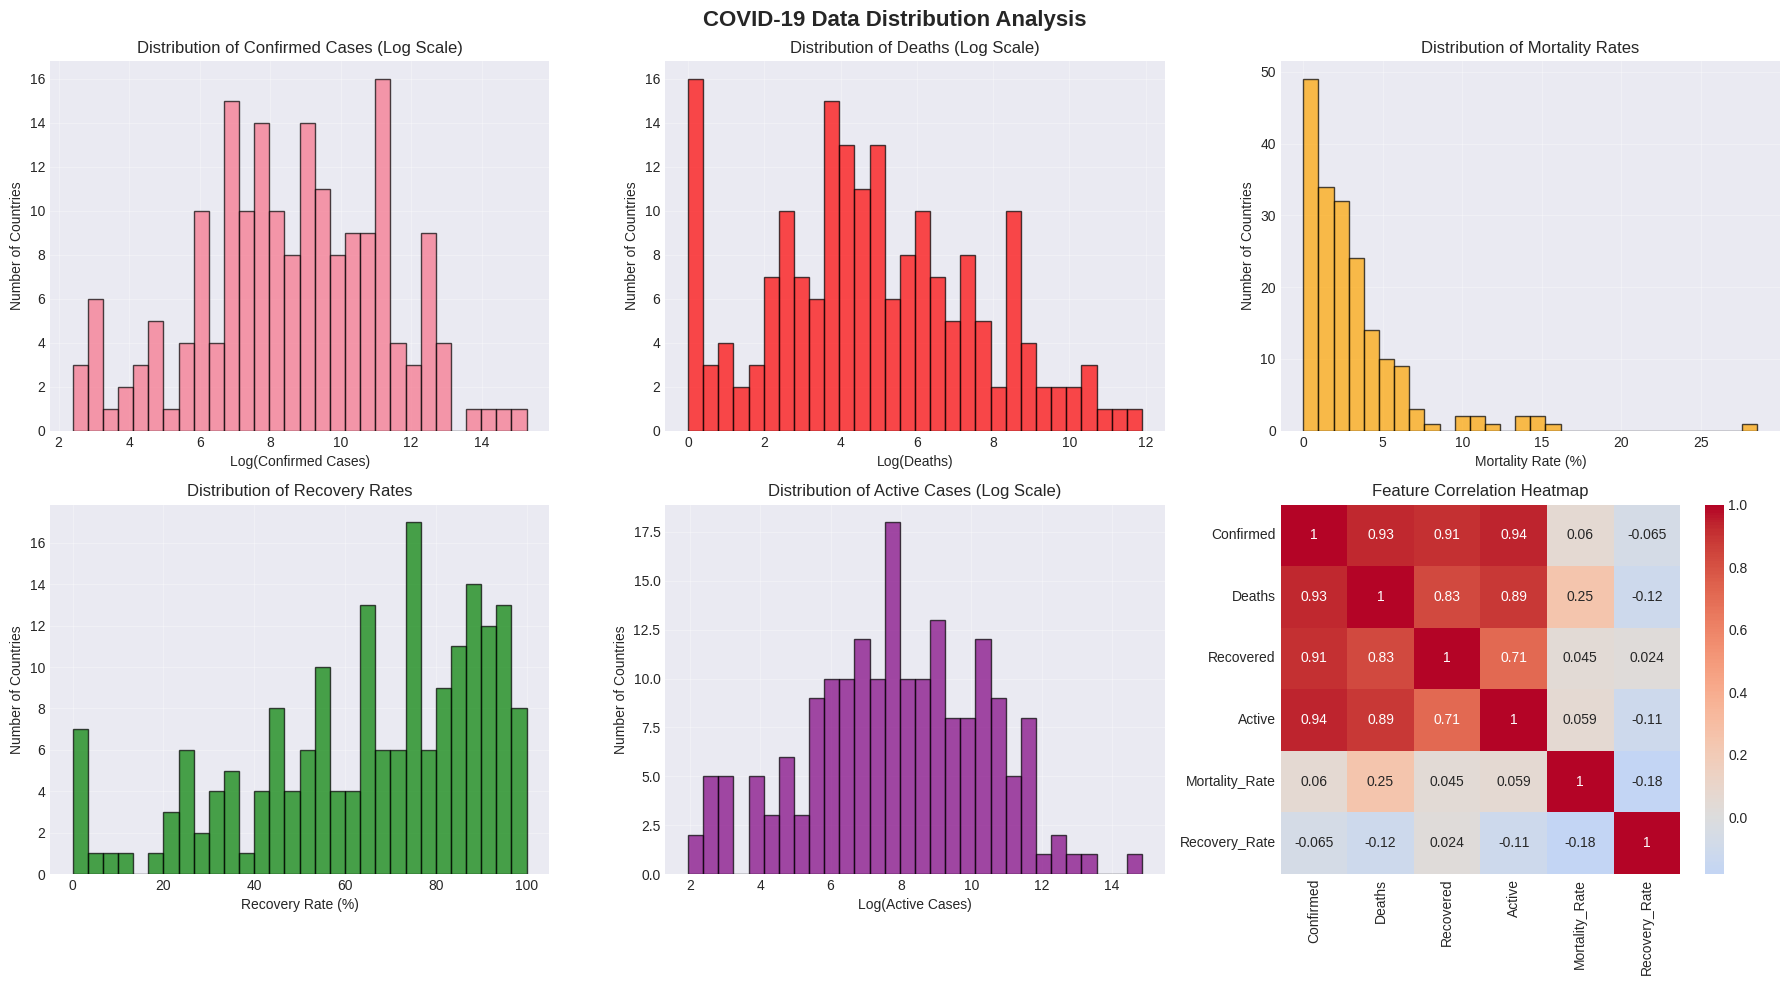

✅ EDA visualizations completed!


In [4]:
# ===========================================
# CELL 4: EXPLORATORY DATA ANALYSIS (EDA)
# ===========================================

print("🔍 EXPLORATORY DATA ANALYSIS (EDA)")
print("="*50)

# 1. Global statistics
print("\n1. 🌍 GLOBAL STATISTICS (Latest Data):")
latest_date = covid_df['Date'].max()
latest_data = covid_df[covid_df['Date'] == latest_date]

global_stats = {
    'Total Confirmed': latest_data['Confirmed'].sum(),
    'Total Deaths': latest_data['Deaths'].sum(),
    'Total Recovered': latest_data['Recovered'].sum(),
    'Total Active': latest_data['Active'].sum(),
    'Global Mortality Rate': (latest_data['Deaths'].sum() / latest_data['Confirmed'].sum()) * 100,
    'Global Recovery Rate': (latest_data['Recovered'].sum() / latest_data['Confirmed'].sum()) * 100
}

for stat, value in global_stats.items():
    if 'Rate' in stat:
        print(f"   • {stat}: {value:.2f}%")
    else:
        print(f"   • {stat}: {value:,.0f}")

# 2. Top 10 affected countries
print("\n2. 🏆 TOP 10 MOST AFFECTED COUNTRIES:")
top_countries = country_data.nlargest(10, 'Confirmed')[['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Mortality_Rate']]
for idx, row in top_countries.iterrows():
    print(f"   {idx+1:2d}. {row['Country/Region'][:25]:25} | Confirmed: {row['Confirmed']:9,} | Deaths: {row['Deaths']:7,} | Mortality: {row['Mortality_Rate']:.1f}%")

# 3. Time series analysis
print("\n3. 📈 TIME SERIES ANALYSIS:")
daily_global = covid_df.groupby('Date').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Active': 'sum'
}).reset_index()

print(f"   • Peak daily new cases: {daily_global['Confirmed'].diff().max():,.0f}")
print(f"   • Average daily new cases: {daily_global['Confirmed'].diff().mean():,.0f}")
print(f"   • Total days of data: {len(daily_global)}")

# 4. Distribution analysis
print("\n4. 📊 DISTRIBUTION ANALYSIS:")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('COVID-19 Data Distribution Analysis', fontsize=16, fontweight='bold')

# Confirmed cases distribution
axes[0, 0].hist(country_data['Confirmed'].apply(np.log1p), bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Log(Confirmed Cases)')
axes[0, 0].set_ylabel('Number of Countries')
axes[0, 0].set_title('Distribution of Confirmed Cases (Log Scale)')
axes[0, 0].grid(True, alpha=0.3)

# Deaths distribution
axes[0, 1].hist(country_data['Deaths'].apply(np.log1p), bins=30, edgecolor='black', alpha=0.7, color='red')
axes[0, 1].set_xlabel('Log(Deaths)')
axes[0, 1].set_ylabel('Number of Countries')
axes[0, 1].set_title('Distribution of Deaths (Log Scale)')
axes[0, 1].grid(True, alpha=0.3)

# Mortality rate distribution
axes[0, 2].hist(country_data['Mortality_Rate'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[0, 2].set_xlabel('Mortality Rate (%)')
axes[0, 2].set_ylabel('Number of Countries')
axes[0, 2].set_title('Distribution of Mortality Rates')
axes[0, 2].grid(True, alpha=0.3)

# Recovery rate distribution
axes[1, 0].hist(country_data['Recovery_Rate'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_xlabel('Recovery Rate (%)')
axes[1, 0].set_ylabel('Number of Countries')
axes[1, 0].set_title('Distribution of Recovery Rates')
axes[1, 0].grid(True, alpha=0.3)

# Active cases distribution
axes[1, 1].hist(country_data['Active'].apply(np.log1p), bins=30, edgecolor='black', alpha=0.7, color='purple')
axes[1, 1].set_xlabel('Log(Active Cases)')
axes[1, 1].set_ylabel('Number of Countries')
axes[1, 1].set_title('Distribution of Active Cases (Log Scale)')
axes[1, 1].grid(True, alpha=0.3)

# Correlation heatmap
corr_data = country_data[['Confirmed', 'Deaths', 'Recovered', 'Active', 'Mortality_Rate', 'Recovery_Rate']].corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, ax=axes[1, 2])
axes[1, 2].set_title('Feature Correlation Heatmap')

plt.tight_layout()
plt.show()

print("✅ EDA visualizations completed!")

In [5]:
# ===========================================
# CELL 5: VISUALIZATION - GLOBAL TRENDS
# ===========================================

print("📈 VISUALIZATION - GLOBAL TRENDS")
print("="*50)

# Create time series visualizations
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Global Cases Over Time', 'Global Deaths Over Time',
                    'Daily New Cases', 'Mortality vs Recovery Rate'),
    specs=[[{"type": "scatter"}, {"type": "scatter"}],
           [{"type": "scatter"}, {"type": "scatter"}]]
)

# 1. Global cases over time
fig.add_trace(
    go.Scatter(x=daily_global['Date'], y=daily_global['Confirmed'],
               mode='lines', name='Confirmed', line=dict(color='blue', width=2)),
    row=1, col=1
)

# 2. Global deaths over time
fig.add_trace(
    go.Scatter(x=daily_global['Date'], y=daily_global['Deaths'],
               mode='lines', name='Deaths', line=dict(color='red', width=2)),
    row=1, col=2
)

# 3. Daily new cases
daily_new = daily_global['Confirmed'].diff()
fig.add_trace(
    go.Scatter(x=daily_global['Date'], y=daily_new,
               mode='lines', name='Daily New Cases', line=dict(color='orange', width=2)),
    row=2, col=1
)

# 4. Mortality vs Recovery rate (scatter)
fig.add_trace(
    go.Scatter(x=country_data['Mortality_Rate'], y=country_data['Recovery_Rate'],
               mode='markers', name='Countries',
               marker=dict(size=country_data['Confirmed'].apply(np.log1p)/10,
                          color=country_data['Confirmed'],
                          colorscale='Viridis',
                          showscale=True,
                          colorbar=dict(title="Confirmed Cases")),
               text=country_data['Country/Region']),
    row=2, col=2
)

fig.update_layout(height=800, width=1200,
                  title_text="COVID-19 Global Trends Analysis",
                  showlegend=True)

fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_xaxes(title_text="Mortality Rate (%)", row=2, col=2)

fig.update_yaxes(title_text="Confirmed Cases", row=1, col=1)
fig.update_yaxes(title_text="Deaths", row=1, col=2)
fig.update_yaxes(title_text="Daily New Cases", row=2, col=1)
fig.update_yaxes(title_text="Recovery Rate (%)", row=2, col=2)

fig.show()

print("✅ Global trend visualizations created!")

📈 VISUALIZATION - GLOBAL TRENDS


✅ Global trend visualizations created!


🌍 COUNTRY COMPARISON & GEOGRAPHICAL ANALYSIS

1. 📊 TOP 10 COUNTRIES COMPARISON:


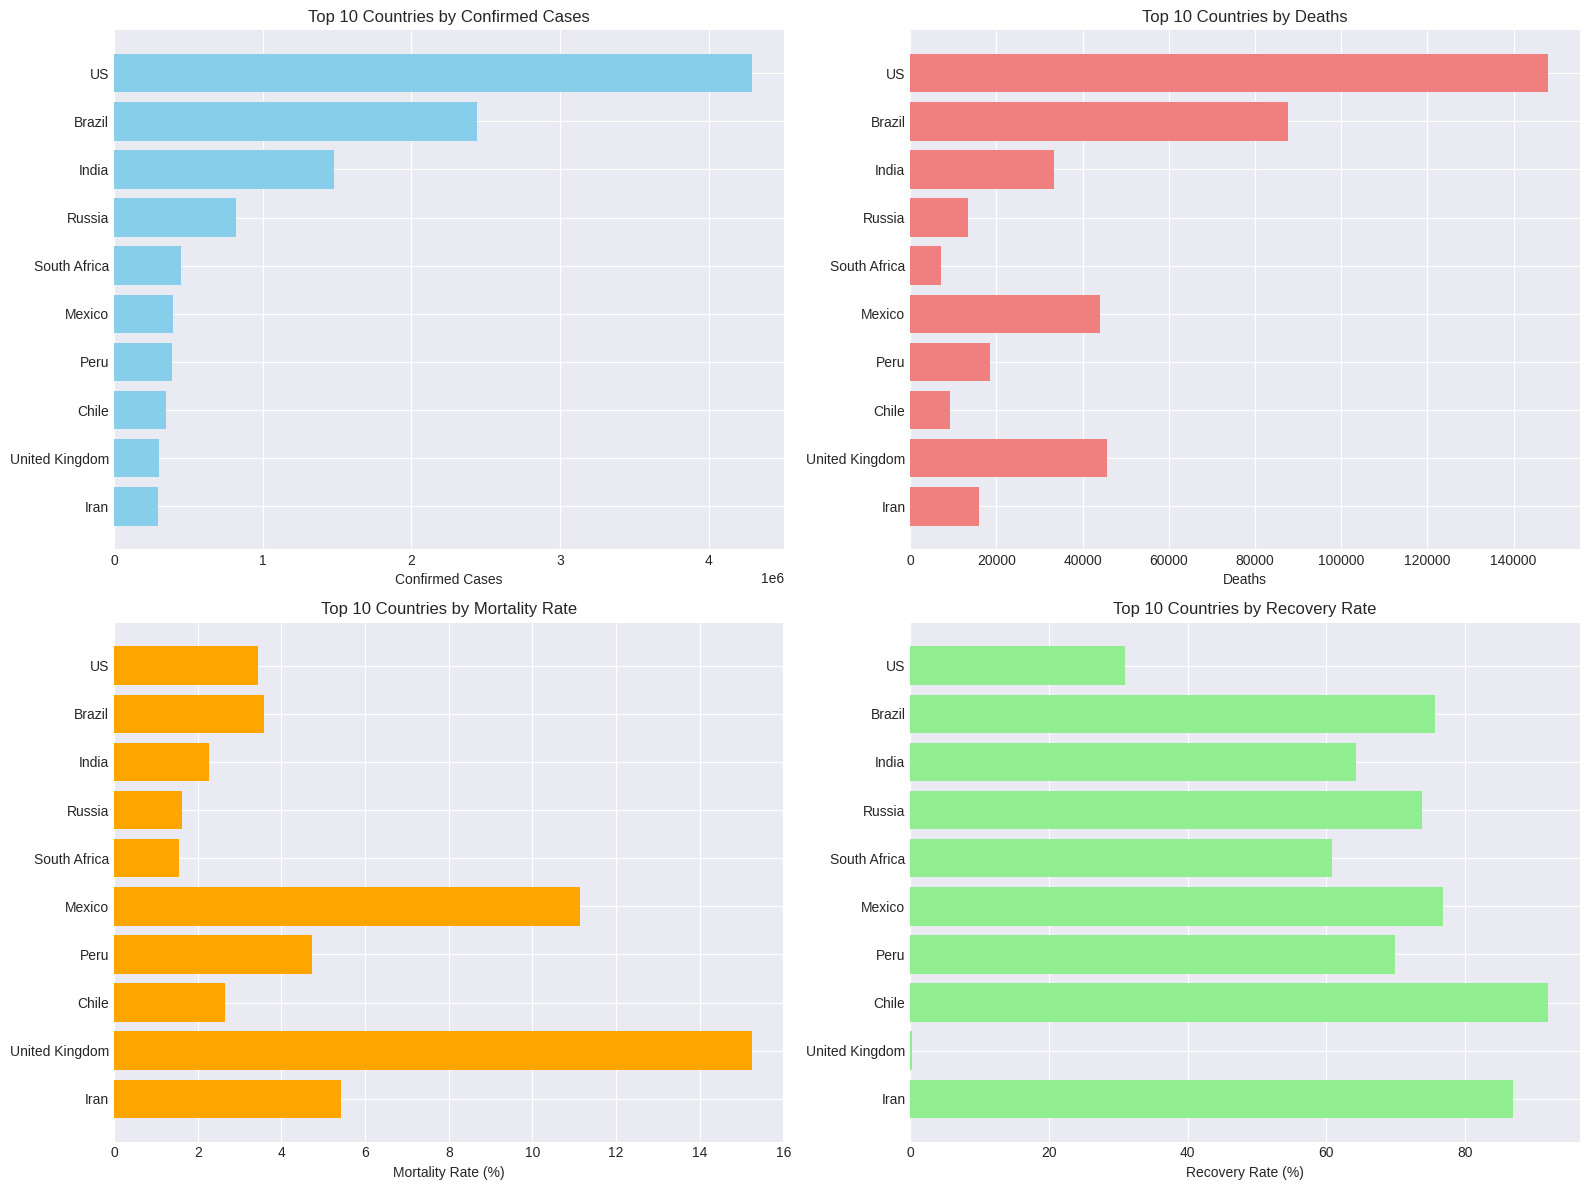


2. 🗺️ INTERACTIVE WORLD MAP VISUALIZATION:



3. 📈 COUNTRY COMPARISON SCATTER PLOT:


✅ Country comparison visualizations completed!


In [6]:
# ===========================================
# CELL 6: COUNTRY COMPARISON & GEOGRAPHICAL ANALYSIS
# ===========================================

print("🌍 COUNTRY COMPARISON & GEOGRAPHICAL ANALYSIS")
print("="*50)

# 1. Top countries comparison
print("\n1. 📊 TOP 10 COUNTRIES COMPARISON:")

top_10 = country_data.nlargest(10, 'Confirmed')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Bar chart: Confirmed cases
axes[0, 0].barh(top_10['Country/Region'], top_10['Confirmed'], color='skyblue')
axes[0, 0].set_xlabel('Confirmed Cases')
axes[0, 0].set_title('Top 10 Countries by Confirmed Cases')
axes[0, 0].invert_yaxis()

# Bar chart: Deaths
axes[0, 1].barh(top_10['Country/Region'], top_10['Deaths'], color='lightcoral')
axes[0, 1].set_xlabel('Deaths')
axes[0, 1].set_title('Top 10 Countries by Deaths')
axes[0, 1].invert_yaxis()

# Bar chart: Mortality Rate
axes[1, 0].barh(top_10['Country/Region'], top_10['Mortality_Rate'], color='orange')
axes[1, 0].set_xlabel('Mortality Rate (%)')
axes[1, 0].set_title('Top 10 Countries by Mortality Rate')
axes[1, 0].invert_yaxis()

# Bar chart: Recovery Rate
axes[1, 1].barh(top_10['Country/Region'], top_10['Recovery_Rate'], color='lightgreen')
axes[1, 1].set_xlabel('Recovery Rate (%)')
axes[1, 1].set_title('Top 10 Countries by Recovery Rate')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

# 2. Interactive world map
print("\n2. 🗺️ INTERACTIVE WORLD MAP VISUALIZATION:")

# Create choropleth map for confirmed cases
fig = px.choropleth(country_data,
                    locations='Country/Region',
                    locationmode='country names',
                    color='Confirmed',
                    hover_name='Country/Region',
                    hover_data=['Deaths', 'Recovered', 'Mortality_Rate'],
                    color_continuous_scale='Reds',
                    title='Global COVID-19 Confirmed Cases Distribution',
                    projection='natural earth')

fig.update_layout(height=600, width=1000)
fig.show()

# 3. Country comparison scatter plot
print("\n3. 📈 COUNTRY COMPARISON SCATTER PLOT:")

fig = px.scatter(country_data,
                 x='Confirmed',
                 y='Deaths',
                 size='Recovered',
                 color='Mortality_Rate',
                 hover_name='Country/Region',
                 log_x=True,
                 log_y=True,
                 size_max=60,
                 color_continuous_scale='Viridis',
                 title='COVID-19: Confirmed Cases vs Deaths (Size = Recovered)')

fig.update_layout(height=600, width=1000)
fig.show()

print("✅ Country comparison visualizations completed!")

📅 TEMPORAL & PATTERN ANALYSIS

1. 📅 MONTHLY TREND ANALYSIS:


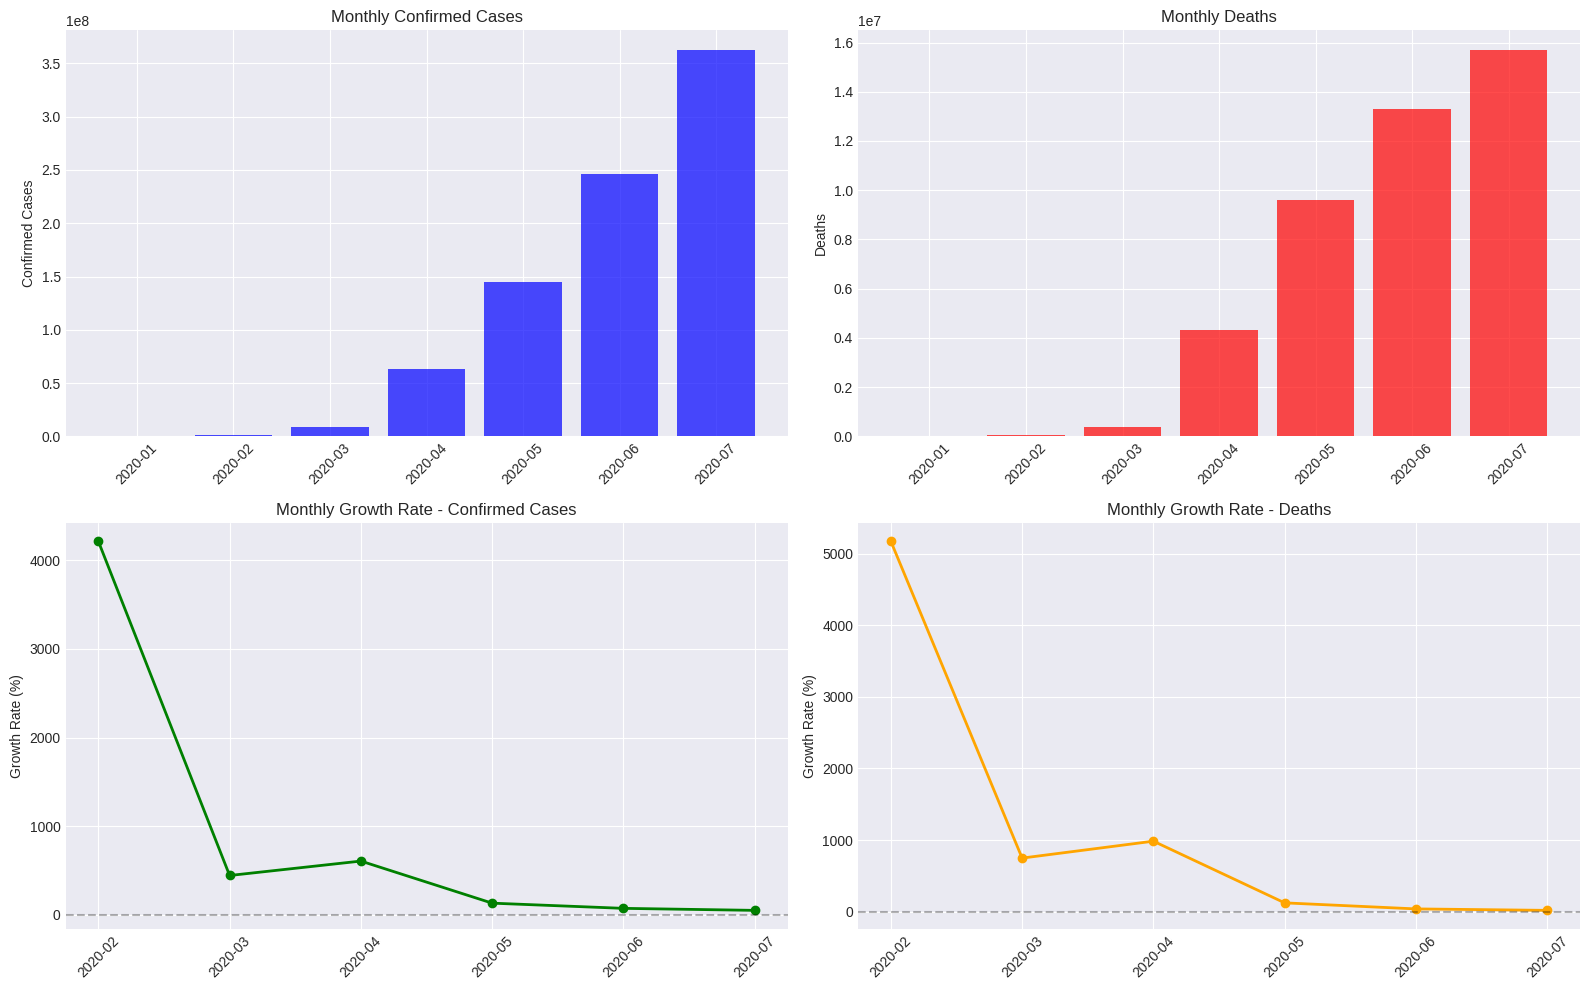


2. 🌊 COVID-19 WAVE ANALYSIS:


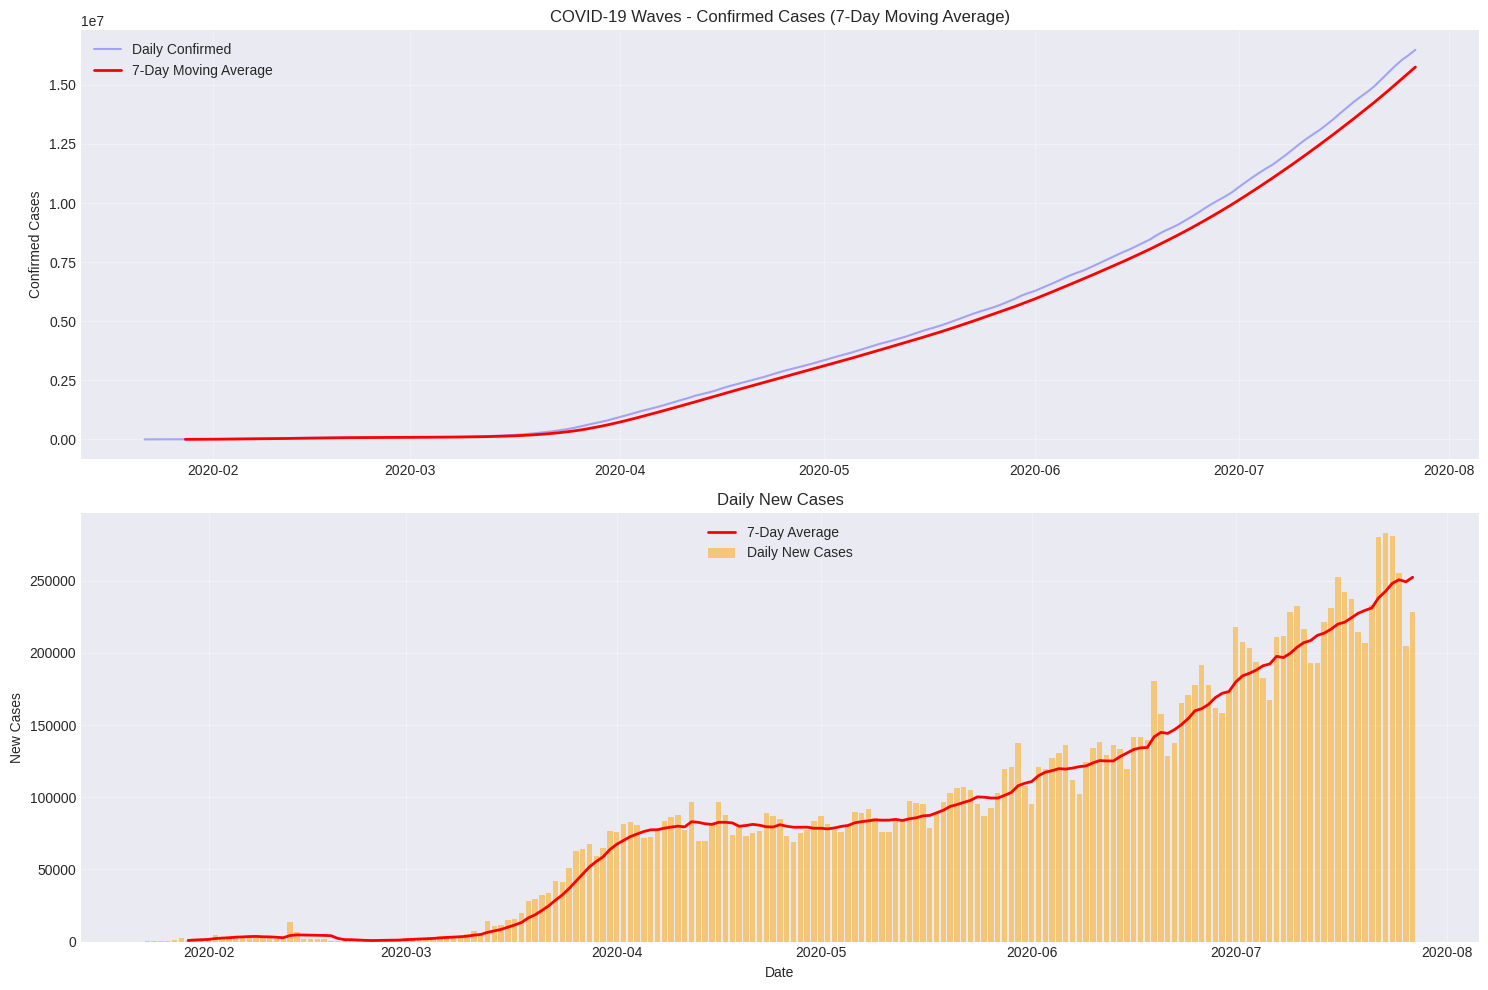


3. 📊 WAVE PEAK IDENTIFICATION:
   • Number of major waves identified: 0
   • Peak dates:
✅ Temporal pattern analysis completed!


In [7]:
# ===========================================
# CELL 7: TEMPORAL & PATTERN ANALYSIS
# ===========================================

print("📅 TEMPORAL & PATTERN ANALYSIS")
print("="*50)

# 1. Monthly trend analysis
print("\n1. 📅 MONTHLY TREND ANALYSIS:")

# Extract month-year and aggregate
covid_df['Month_Year_Str'] = covid_df['Date'].dt.strftime('%Y-%m')
monthly_data = covid_df.groupby('Month_Year_Str').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

# Create monthly growth rates
monthly_data['Monthly_Growth_Confirmed'] = monthly_data['Confirmed'].pct_change() * 100
monthly_data['Monthly_Growth_Deaths'] = monthly_data['Deaths'].pct_change() * 100

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Monthly confirmed cases
axes[0, 0].bar(monthly_data['Month_Year_Str'], monthly_data['Confirmed'], color='blue', alpha=0.7)
axes[0, 0].set_title('Monthly Confirmed Cases')
axes[0, 0].set_ylabel('Confirmed Cases')
axes[0, 0].tick_params(axis='x', rotation=45)

# Monthly deaths
axes[0, 1].bar(monthly_data['Month_Year_Str'], monthly_data['Deaths'], color='red', alpha=0.7)
axes[0, 1].set_title('Monthly Deaths')
axes[0, 1].set_ylabel('Deaths')
axes[0, 1].tick_params(axis='x', rotation=45)

# Monthly growth rate - Confirmed
axes[1, 0].plot(monthly_data['Month_Year_Str'], monthly_data['Monthly_Growth_Confirmed'],
                marker='o', color='green', linewidth=2)
axes[1, 0].axhline(y=0, color='black', linestyle='--', alpha=0.3)
axes[1, 0].set_title('Monthly Growth Rate - Confirmed Cases')
axes[1, 0].set_ylabel('Growth Rate (%)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Monthly growth rate - Deaths
axes[1, 1].plot(monthly_data['Month_Year_Str'], monthly_data['Monthly_Growth_Deaths'],
                marker='o', color='orange', linewidth=2)
axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.3)
axes[1, 1].set_title('Monthly Growth Rate - Deaths')
axes[1, 1].set_ylabel('Growth Rate (%)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 2. Wave analysis (identify peaks)
print("\n2. 🌊 COVID-19 WAVE ANALYSIS:")

# Calculate 7-day moving average
daily_global['MA7_Confirmed'] = daily_global['Confirmed'].rolling(window=7).mean()
daily_global['Daily_New'] = daily_global['Confirmed'].diff()

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Original vs smoothed
axes[0].plot(daily_global['Date'], daily_global['Confirmed'], alpha=0.3, label='Daily Confirmed', color='blue')
axes[0].plot(daily_global['Date'], daily_global['MA7_Confirmed'], linewidth=2, label='7-Day Moving Average', color='red')
axes[0].set_title('COVID-19 Waves - Confirmed Cases (7-Day Moving Average)')
axes[0].set_ylabel('Confirmed Cases')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Daily new cases
axes[1].bar(daily_global['Date'], daily_global['Daily_New'], alpha=0.5, color='orange', label='Daily New Cases')
axes[1].plot(daily_global['Date'], daily_global['Daily_New'].rolling(window=7).mean(),
            linewidth=2, color='red', label='7-Day Average')
axes[1].set_title('Daily New Cases')
axes[1].set_ylabel('New Cases')
axes[1].set_xlabel('Date')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Identify peaks (wave peaks)
print("\n3. 📊 WAVE PEAK IDENTIFICATION:")

# Find local maxima in 7-day MA
from scipy.signal import find_peaks
peaks, _ = find_peaks(daily_global['MA7_Confirmed'].dropna(), distance=30, prominence=100000)

print(f"   • Number of major waves identified: {len(peaks)}")
print(f"   • Peak dates:")

for i, peak_idx in enumerate(peaks[:5]):  # Show first 5 peaks
    peak_date = daily_global.iloc[peak_idx]['Date']
    peak_value = int(daily_global.iloc[peak_idx]['MA7_Confirmed'])
    print(f"     Wave {i+1}: {peak_date.strftime('%Y-%m-%d')} - {peak_value:,} cases")

print("✅ Temporal pattern analysis completed!")

In [8]:
# ===========================================
# CELL 8: INSIGHTS & RECOMMENDATIONS
# ===========================================

print("💡 KEY INSIGHTS & RECOMMENDATIONS")
print("="*50)
print("\nBased on comprehensive COVID-19 data analysis:")

# Calculate key insights
total_confirmed = global_stats['Total Confirmed']
total_deaths = global_stats['Total Deaths']
mortality_rate = global_stats['Global Mortality Rate']
recovery_rate = global_stats['Global Recovery Rate']

# 1. Global impact
print("\n1. 🌍 GLOBAL IMPACT:")
print(f"   • Total confirmed cases: {total_confirmed:,}")
print(f"   • Total deaths: {total_deaths:,}")
print(f"   • Global mortality rate: {mortality_rate:.2f}%")
print(f"   • Global recovery rate: {recovery_rate:.2f}%")

# 2. Country performance
print("\n2. 🏆 COUNTRY PERFORMANCE ANALYSIS:")
print(f"   • Countries with data: {country_data.shape[0]}")
print(f"   • Average cases per country: {country_data['Confirmed'].mean():,.0f}")
print(f"   • Average mortality rate: {country_data['Mortality_Rate'].mean():.2f}%")

# Top performers (low mortality, high recovery)
best_performers = country_data[(country_data['Confirmed'] > 10000) &
                               (country_data['Mortality_Rate'] < 1) &
                               (country_data['Recovery_Rate'] > 90)].nlargest(5, 'Recovery_Rate')

print(f"   • Best performing countries (high recovery, low mortality):")
for idx, row in best_performers.iterrows():
    print(f"     - {row['Country/Region']}: {row['Recovery_Rate']:.1f}% recovery, {row['Mortality_Rate']:.1f}% mortality")

# 3. Temporal patterns
print("\n3. 📅 TEMPORAL PATTERNS:")
print(f"   • Data covers: {daily_global['Date'].min().strftime('%Y-%m-%d')} to {daily_global['Date'].max().strftime('%Y-%m-%d')}")
print(f"   • Peak daily new cases: {daily_global['Confirmed'].diff().max():,.0f}")
print(f"   • Average daily growth: {daily_global['Confirmed'].pct_change().mean()*100:.2f}%")

# 4. Correlations and relationships
print("\n4. 🔗 KEY CORRELATIONS:")
corr_confirmed_deaths = country_data['Confirmed'].corr(country_data['Deaths'])
corr_confirmed_mortality = country_data['Confirmed'].corr(country_data['Mortality_Rate'])

print(f"   • Confirmed vs Deaths correlation: {corr_confirmed_deaths:.3f} (Strong positive)")
print(f"   • Confirmed vs Mortality Rate correlation: {corr_confirmed_mortality:.3f} (Weak correlation)")
print("     → Suggests healthcare capacity, not just case count, affects mortality")

# 5. Recommendations
print("\n5. 🎯 PUBLIC HEALTH RECOMMENDATIONS:")
recommendations = [
    "1. FOCUS ON EARLY DETECTION: Countries with lower mortality rates likely had better early testing",
    "2. HEALTHCARE CAPACITY CRITICAL: High case count doesn't necessarily mean high mortality if healthcare is robust",
    "3. LEARN FROM BEST PERFORMERS: Study countries with high recovery rates (>90%) for best practices",
    "4. PREPARE FOR WAVES: Data shows clear wave patterns - prepare healthcare systems for periodic surges",
    "5. TARGETED INTERVENTIONS: Focus resources on high-mortality regions rather than blanket approaches"
]

for rec in recommendations:
    print(f"   {rec}")

# 6. Business/economic insights
print("\n6. 💼 BUSINESS & ECONOMIC INSIGHTS:")
business_insights = [
    "• TRAVEL & TOURISM: Correlate case surges with travel restrictions for predictive modeling",
    "• SUPPLY CHAIN: Manufacturing countries' COVID trends affect global supply chains",
    "• HEALTHCARE INVESTMENT: Countries with better healthcare infrastructure showed better outcomes",
    "• REMOTE WORK ADOPTION: Peak periods correlate with increased remote work infrastructure needs"
]

for insight in business_insights:
    print(f"   {insight}")

# 7. Limitations
print("\n7. ⚠️ ANALYSIS LIMITATIONS:")
limitations = [
    "• Data quality varies by country (testing rates, reporting standards)",
    "• Time period covered may not include latest variants",
    "• Vaccination data not included in this analysis",
    "• Socio-economic factors not accounted for"
]

for limit in limitations:
    print(f"   {limit}")

print("\n✅ Analysis complete! Ready for reporting and dashboard creation.")

💡 KEY INSIGHTS & RECOMMENDATIONS

Based on comprehensive COVID-19 data analysis:

1. 🌍 GLOBAL IMPACT:
   • Total confirmed cases: 16,480,485
   • Total deaths: 654,036
   • Global mortality rate: 3.97%
   • Global recovery rate: 57.45%

2. 🏆 COUNTRY PERFORMANCE ANALYSIS:
   • Countries with data: 187
   • Average cases per country: 87,616
   • Average mortality rate: 3.06%
   • Best performing countries (high recovery, low mortality):
     - Qatar: 97.0% recovery, 0.2% mortality
     - Bahrain: 91.5% recovery, 0.4% mortality

3. 📅 TEMPORAL PATTERNS:
   • Data covers: 2020-01-22 to 2020-07-27
   • Peak daily new cases: 282,756
   • Average daily growth: 6.05%

4. 🔗 KEY CORRELATIONS:
   • Confirmed vs Deaths correlation: 0.934 (Strong positive)
   • Confirmed vs Mortality Rate correlation: 0.060 (Weak correlation)
     → Suggests healthcare capacity, not just case count, affects mortality

5. 🎯 PUBLIC HEALTH RECOMMENDATIONS:
   1. FOCUS ON EARLY DETECTION: Countries with lower mortality 